In [1]:
import matplotlib.pyplot as plt
import numpy as np
import healpy as hp
import pysm3
import pysm3.units as u
from mapsim.noise_calc import *
import os

### Create a simple single frequency CMB map with pysm3

In [2]:
# Define params
nside = 64 #512
nu = 93
unit = u.uK_CMB
np.random.seed(1000)

In [3]:
# Generate sky map
cmps = ["c1"] # sky components, currently CMB only
sky = pysm3.Sky(nside=nside, preset_strings=cmps, output_unit="uK_CMB")
mapp = sky.get_emission(nu * u.GHz)
mapp.to(u.uK_CMB, equivalencies=u.cmb_equivalencies(nu*u.GHz))

<Quantity [[-1.77542802e+01,  3.51019942e+01,  5.27772087e+01, ...,
             1.40447339e+02,  3.52633232e+01,  7.21270559e+01],
           [ 3.00806450e-01,  9.20491316e-01, -2.15198365e-01, ...,
             9.64513100e-01, -4.28309964e-01,  8.37245653e-01],
           [ 6.06456940e-01, -1.74524708e+00,  1.26930988e+00, ...,
             4.00441826e-01, -5.20235075e-03, -2.40545752e-01]] uK_CMB>

In [4]:
# Smoothing, Equatorial coordinates, RING format
smooth = 0
if smooth:
    lmax = 3*nside-1
    beams = Simons_Observatory_V3_SA_beam_FWHM()
    ch_name = 'SO_SAT_93'
    nch = 2 #2nd freq channel
    fwhm = beams[nch]/60 #rad
    #map = pysm3.apply_smoothing_and_coord_transform(mapp, fwhm=fwhm, lmax=lmax, rot=hp.Rotator(coord="GC"))
    map = hp.smoothing(mapp, fwhm = np.radians(fwhm/60.))
else:
    map = mapp

In [5]:
# Write to disk 
os.system('mkdir -p input_maps')
hp.write_map(f'input_maps/cmb_SAT_f0{nu}_ns{nside}.fits', map, coord="C", dtype=np.float32, overwrite=True)

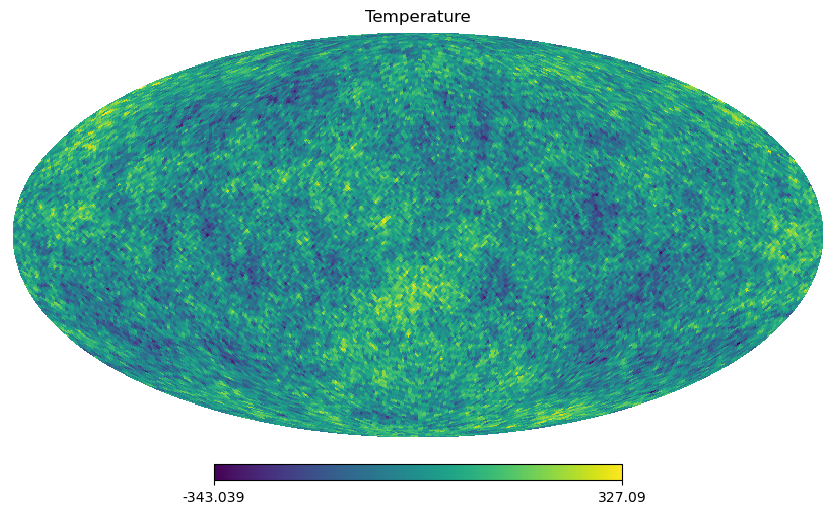

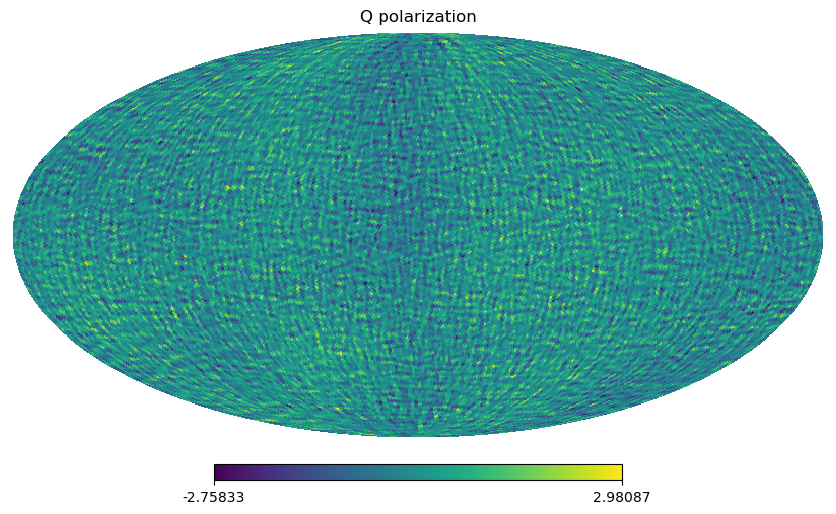

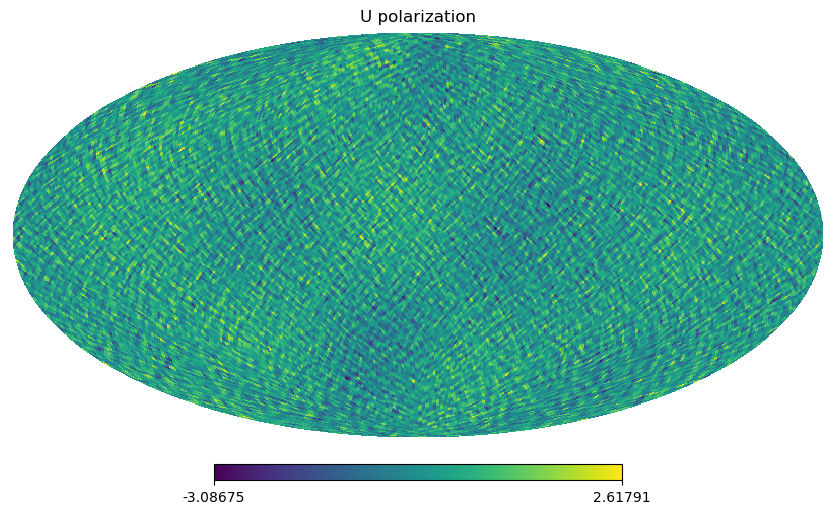

In [6]:
# Plot
npol = 3 # I,Q,U
lbl = ['Temperature', 'Q polarization', 'U polarization']
for pol in np.arange(npol):
    hp.mollview(map[pol,:], title=lbl[pol])

In [9]:
#TODO: Integrate with current tools, e.g. BBSims

#### Continue to the next section

Go to [Section 3 - Schedule](Sec3_Make_and_Analyze_schedule.ipynb).